Survival Probability for Runner (Speed=25, Ammo=1): 0.9995
Prediction: SURVIVES


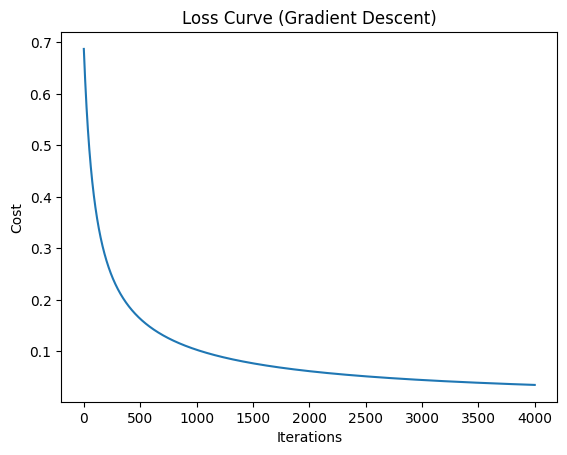

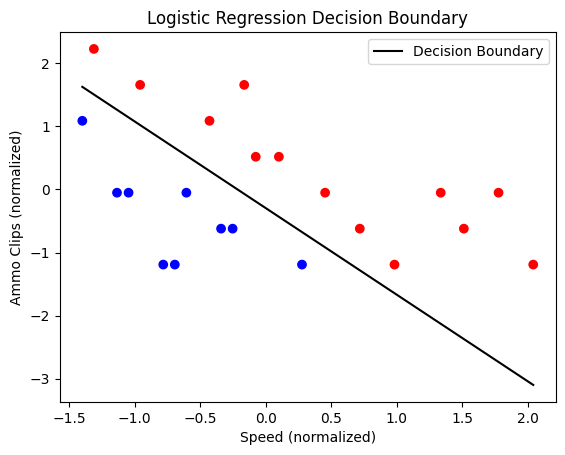

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def load_data(filename):
    speeds = []
    ammo = []
    labels = []

    with open(filename, "r") as f:
        next(f)
        for line in f:
            s, a, y = line.strip().split(",")
            speeds.append(float(s))
            ammo.append(float(a))
            labels.append(int(y))

    return np.array(speeds), np.array(ammo), np.array(labels)

def normalize(x):
    mean = np.mean(x)
    std = np.std(x)
    return (x - mean) / std, mean, std

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    n = len(y)
    z = np.dot(X, w) + b
    h = sigmoid(z)
    cost = -(1/n) * np.sum(y*np.log(h + 1e-9) + (1-y)*np.log(1-h + 1e-9))
    return cost

def gradient_descent(X, y, lr=0.01, epochs=5000):
    n, features = X.shape
    w = np.zeros(features)
    b = 0
    cost_history = []

    for _ in range(epochs):
        z = np.dot(X, w) + b
        h = sigmoid(z)

        dw = (1/n) * np.dot(X.T, (h - y))
        db = (1/n) * np.sum(h - y)

        w -= lr * dw
        b -= lr * db

        cost_history.append(compute_cost(X, y, w, b))

    return w, b, cost_history

def predict(speed, ammo, w, b, means, stds):
    x = np.array([(speed - means[0]) / stds[0],
                  (ammo - means[1]) / stds[1]])
    prob = sigmoid(np.dot(x, w) + b)
    return prob

def plot_loss(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Loss Curve (Gradient Descent)")
    plt.show()

def plot_decision_boundary(X, y, w, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
    x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_vals = (-b - w[0] * x_vals) / w[1]

    plt.plot(x_vals, y_vals, color="black", label="Decision Boundary")
    plt.xlabel("Speed (normalized)")
    plt.ylabel("Ammo Clips (normalized)")
    plt.legend()
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

if __name__ == "__main__":
    speeds, ammo, labels = load_data("zday_data.csv")

    #Normalizing the inputs
    speeds_norm, mean_s, std_s = normalize(speeds)
    ammo_norm, mean_a, std_a = normalize(ammo)

    #Combining into X matrix
    X = np.column_stack((speeds_norm, ammo_norm))
    y = labels

    # Train logistic regression
    w, b, cost_history = gradient_descent(X, y, lr=0.05, epochs=4000)

    #Test prediction
    test_speed = 25
    test_ammo = 1
    prob = predict(test_speed, test_ammo, w, b, (mean_s, mean_a), (std_s, std_a))

    print(f"Survival Probability for Runner (Speed=25, Ammo=1): {prob:.4f}")
    print("Prediction:", "SURVIVES" if prob >= 0.5 else "INFECTED")

    # Visualizations
    plot_loss(cost_history)
    plot_decision_boundary(X, y, w, b)
